In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
%matplotlib inline

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False
# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)

# 从硬盘读取数据进入内存
df = pd.read_excel("Molecular_Descriptor.xlsx")
df1 = pd.read_excel("ADMET.xlsx")

In [2]:
#方差过滤

count = 0
column = []

for j in range(df.shape[1] - 1):
    if df.iloc[:,j + 1].std() == 0:
        column.append(j + 1)

#for i in column:
df.drop(labels = df.columns[column], axis= 1, inplace = True)

In [3]:
#特征选择

import pandas as pd
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

#将数据划分为标签和特征
X = df.drop(['SMILES'],axis = 1).values
y = df1['Caco-2'].values

# 分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

from sklearn.ensemble import RandomForestClassifier #分类

feature_name = df.drop(['SMILES'],axis = 1).columns
rfc = RandomForestClassifier(n_estimators=60, random_state=0) # 随机森林实例化
# 训练
rfc = rfc.fit(Xtrain,Ytrain)
# 得分
score_Random_Forest = rfc.score(Xtest,Ytest)
print(score_Random_Forest)

r = [*zip(feature_name,rfc.feature_importances_)]
r.sort(key=lambda x:x[1],reverse = True)

0.9190556492411467


In [4]:
#特征个数选择

count = []

for i in range(60):
    count.append(r[i][0])

count

['SP-1',
 'nBonds',
 'MW',
 'Kier3',
 'WTPT-1',
 'MLFER_L',
 'ETA_Beta_s',
 'WPATH',
 'Zagreb',
 'ETA_Alpha',
 'VP-0',
 'nHeavyAtom',
 'minaaO',
 'sumI',
 'MLFER_S',
 'McGowan_Volume',
 'ETA_Eta_R_L',
 'MLFER_BH',
 'ECCEN',
 'Kier1',
 'Kier2',
 'ETA_Eta_R',
 'VABC',
 'ETA_Beta',
 'SaaO',
 'maxaaO',
 'SP-0',
 'SP-3',
 'TopoPSA',
 'apol',
 'FMF',
 'naAromAtom',
 'nAtom',
 'ATSp2',
 'SP-2',
 'SP-7',
 'nBondsS',
 'ATSm2',
 'ATSm5',
 'SCH-6',
 'MDEC-22',
 'MLFER_E',
 'SsCH3',
 'minaasC',
 'ATSm1',
 'nwHBa',
 'MDEC-12',
 'SC-5',
 'SCH-5',
 'naaO',
 'ETA_dEpsilon_D',
 'ATSp5',
 'BCUTp-1l',
 'ETA_dBeta',
 'naaN',
 'nT5Ring',
 'ETA_Shape_Y',
 'nAromBond',
 'minHBint5',
 'maxHBd']

In [5]:
df[count].shape[1]

60

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                610       
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 632
Trainable params: 632
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10000
113/113 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.6089 - val_loss: 0.6581 - val_accuracy: 0.5840 - lr: 0.0010
Epoch 2/10000
113/113 [==============================] - 0s 734us/step - loss: 0.6253 - accuracy: 0.6107 - val_loss: 0.6329 - val_accuracy: 0.5840 - lr: 0.0010
Epoch 3/10000
113/113 [==============================] - 0s 744us/step - loss: 0.5981 - accuracy: 0.6107 - val_loss: 0.6071 - val_accura

Epoch 48/10000
113/113 [==============================] - 0s 764us/step - loss: 0.2869 - accuracy: 0.8933 - val_loss: 0.3285 - val_accuracy: 0.8693 - lr: 0.0010
Epoch 49/10000
113/113 [==============================] - 0s 767us/step - loss: 0.2862 - accuracy: 0.8951 - val_loss: 0.3277 - val_accuracy: 0.8693 - lr: 0.0010
Epoch 50/10000
113/113 [==============================] - 0s 775us/step - loss: 0.2856 - accuracy: 0.8942 - val_loss: 0.3269 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 51/10000
113/113 [==============================] - 0s 829us/step - loss: 0.2850 - accuracy: 0.8942 - val_loss: 0.3262 - val_accuracy: 0.8747 - lr: 0.0010
Epoch 52/10000
113/113 [==============================] - 0s 827us/step - loss: 0.2843 - accuracy: 0.8942 - val_loss: 0.3255 - val_accuracy: 0.8747 - lr: 0.0010
Epoch 53/10000
113/113 [==============================] - 0s 803us/step - loss: 0.2837 - accuracy: 0.8951 - val_loss: 0.3247 - val_accuracy: 0.8773 - lr: 0.0010
Epoch 54/10000
113/113 [==========

Epoch 99/10000
113/113 [==============================] - 0s 861us/step - loss: 0.2669 - accuracy: 0.8996 - val_loss: 0.3057 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 100/10000
113/113 [==============================] - 0s 829us/step - loss: 0.2667 - accuracy: 0.9004 - val_loss: 0.3055 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 101/10000
113/113 [==============================] - 0s 844us/step - loss: 0.2665 - accuracy: 0.9004 - val_loss: 0.3053 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 102/10000
113/113 [==============================] - 0s 796us/step - loss: 0.2663 - accuracy: 0.9004 - val_loss: 0.3050 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 103/10000
113/113 [==============================] - 0s 831us/step - loss: 0.2661 - accuracy: 0.9004 - val_loss: 0.3048 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 104/10000
113/113 [==============================] - 0s 781us/step - loss: 0.2659 - accuracy: 0.9004 - val_loss: 0.3046 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 105/10000
113/113 [====

113/113 [==============================] - 0s 761us/step - loss: 0.2584 - accuracy: 0.9031 - val_loss: 0.2984 - val_accuracy: 0.8747 - lr: 0.0010
Epoch 150/10000
113/113 [==============================] - 0s 751us/step - loss: 0.2583 - accuracy: 0.9031 - val_loss: 0.2984 - val_accuracy: 0.8747 - lr: 0.0010
Epoch 151/10000
113/113 [==============================] - 0s 764us/step - loss: 0.2582 - accuracy: 0.9031 - val_loss: 0.2983 - val_accuracy: 0.8747 - lr: 0.0010
Epoch 152/10000
113/113 [==============================] - 0s 759us/step - loss: 0.2580 - accuracy: 0.9031 - val_loss: 0.2982 - val_accuracy: 0.8747 - lr: 0.0010
Epoch 153/10000
113/113 [==============================] - 0s 776us/step - loss: 0.2579 - accuracy: 0.9031 - val_loss: 0.2981 - val_accuracy: 0.8747 - lr: 0.0010
Epoch 154/10000
113/113 [==============================] - 0s 744us/step - loss: 0.2578 - accuracy: 0.9031 - val_loss: 0.2980 - val_accuracy: 0.8747 - lr: 0.0010
Epoch 155/10000
113/113 [===================

Epoch 200/10000
113/113 [==============================] - 0s 921us/step - loss: 0.2525 - accuracy: 0.9076 - val_loss: 0.2950 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 201/10000
113/113 [==============================] - 0s 779us/step - loss: 0.2523 - accuracy: 0.9076 - val_loss: 0.2949 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 202/10000
113/113 [==============================] - 0s 759us/step - loss: 0.2522 - accuracy: 0.9084 - val_loss: 0.2949 - val_accuracy: 0.8693 - lr: 0.0010
Epoch 203/10000
113/113 [==============================] - 0s 768us/step - loss: 0.2521 - accuracy: 0.9084 - val_loss: 0.2948 - val_accuracy: 0.8693 - lr: 0.0010
Epoch 204/10000
113/113 [==============================] - 0s 751us/step - loss: 0.2520 - accuracy: 0.9084 - val_loss: 0.2948 - val_accuracy: 0.8693 - lr: 0.0010
Epoch 205/10000
113/113 [==============================] - 0s 775us/step - loss: 0.2519 - accuracy: 0.9084 - val_loss: 0.2947 - val_accuracy: 0.8693 - lr: 0.0010
Epoch 206/10000
113/113 [===

113/113 [==============================] - 0s 759us/step - loss: 0.2475 - accuracy: 0.9058 - val_loss: 0.2926 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 251/10000
113/113 [==============================] - 0s 736us/step - loss: 0.2474 - accuracy: 0.9058 - val_loss: 0.2925 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 252/10000
113/113 [==============================] - 0s 754us/step - loss: 0.2473 - accuracy: 0.9067 - val_loss: 0.2925 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 253/10000
113/113 [==============================] - 0s 755us/step - loss: 0.2472 - accuracy: 0.9067 - val_loss: 0.2924 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 254/10000
113/113 [==============================] - 0s 749us/step - loss: 0.2471 - accuracy: 0.9067 - val_loss: 0.2924 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 255/10000
113/113 [==============================] - 0s 742us/step - loss: 0.2470 - accuracy: 0.9067 - val_loss: 0.2923 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 256/10000
113/113 [===================

Epoch 301/10000
113/113 [==============================] - 0s 758us/step - loss: 0.2430 - accuracy: 0.9093 - val_loss: 0.2904 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 302/10000
113/113 [==============================] - 0s 740us/step - loss: 0.2429 - accuracy: 0.9093 - val_loss: 0.2904 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 303/10000
113/113 [==============================] - 0s 748us/step - loss: 0.2428 - accuracy: 0.9093 - val_loss: 0.2904 - val_accuracy: 0.8693 - lr: 0.0010
Epoch 304/10000
113/113 [==============================] - 0s 765us/step - loss: 0.2427 - accuracy: 0.9093 - val_loss: 0.2903 - val_accuracy: 0.8693 - lr: 0.0010
Epoch 305/10000
113/113 [==============================] - 0s 761us/step - loss: 0.2426 - accuracy: 0.9093 - val_loss: 0.2903 - val_accuracy: 0.8693 - lr: 0.0010
Epoch 306/10000
113/113 [==============================] - 0s 757us/step - loss: 0.2426 - accuracy: 0.9093 - val_loss: 0.2902 - val_accuracy: 0.8693 - lr: 0.0010
Epoch 307/10000
113/113 [===

113/113 [==============================] - 0s 814us/step - loss: 0.2391 - accuracy: 0.9102 - val_loss: 0.2888 - val_accuracy: 0.8640 - lr: 0.0010
Epoch 352/10000
113/113 [==============================] - 0s 825us/step - loss: 0.2390 - accuracy: 0.9102 - val_loss: 0.2888 - val_accuracy: 0.8640 - lr: 0.0010
Epoch 353/10000
113/113 [==============================] - 0s 748us/step - loss: 0.2389 - accuracy: 0.9102 - val_loss: 0.2888 - val_accuracy: 0.8640 - lr: 0.0010
Epoch 354/10000
113/113 [==============================] - 0s 734us/step - loss: 0.2389 - accuracy: 0.9102 - val_loss: 0.2887 - val_accuracy: 0.8640 - lr: 0.0010
Epoch 355/10000
113/113 [==============================] - 0s 753us/step - loss: 0.2388 - accuracy: 0.9102 - val_loss: 0.2887 - val_accuracy: 0.8640 - lr: 0.0010
Epoch 356/10000
113/113 [==============================] - 0s 711us/step - loss: 0.2387 - accuracy: 0.9102 - val_loss: 0.2887 - val_accuracy: 0.8640 - lr: 0.0010
Epoch 357/10000
113/113 [===================

113/113 [==============================] - 0s 789us/step - loss: 0.2354 - accuracy: 0.9111 - val_loss: 0.2871 - val_accuracy: 0.8693 - lr: 5.1200e-04
Epoch 402/10000
113/113 [==============================] - 0s 765us/step - loss: 0.2352 - accuracy: 0.9111 - val_loss: 0.2868 - val_accuracy: 0.8720 - lr: 4.0960e-04
Epoch 403/10000
113/113 [==============================] - 0s 746us/step - loss: 0.2351 - accuracy: 0.9111 - val_loss: 0.2868 - val_accuracy: 0.8720 - lr: 4.0960e-04
Epoch 404/10000
113/113 [==============================] - 0s 754us/step - loss: 0.2351 - accuracy: 0.9111 - val_loss: 0.2868 - val_accuracy: 0.8720 - lr: 4.0960e-04
Epoch 405/10000
113/113 [==============================] - 0s 880us/step - loss: 0.2351 - accuracy: 0.9111 - val_loss: 0.2868 - val_accuracy: 0.8720 - lr: 4.0960e-04
Epoch 406/10000
113/113 [==============================] - 0s 782us/step - loss: 0.2351 - accuracy: 0.9111 - val_loss: 0.2868 - val_accuracy: 0.8720 - lr: 4.0960e-04
Epoch 407/10000
113/

113/113 [==============================] - 0s 728us/step - loss: 0.2339 - accuracy: 0.9111 - val_loss: 0.2861 - val_accuracy: 0.8800 - lr: 6.8719e-05
Epoch 451/10000
113/113 [==============================] - 0s 754us/step - loss: 0.2339 - accuracy: 0.9111 - val_loss: 0.2861 - val_accuracy: 0.8800 - lr: 6.8719e-05
Epoch 452/10000
113/113 [==============================] - 0s 745us/step - loss: 0.2339 - accuracy: 0.9111 - val_loss: 0.2861 - val_accuracy: 0.8800 - lr: 6.8719e-05
Epoch 453/10000
113/113 [==============================] - 0s 747us/step - loss: 0.2339 - accuracy: 0.9111 - val_loss: 0.2861 - val_accuracy: 0.8800 - lr: 6.8719e-05
Epoch 454/10000
113/113 [==============================] - 0s 761us/step - loss: 0.2339 - accuracy: 0.9111 - val_loss: 0.2861 - val_accuracy: 0.8800 - lr: 5.4976e-05
Epoch 455/10000
113/113 [==============================] - 0s 748us/step - loss: 0.2339 - accuracy: 0.9111 - val_loss: 0.2861 - val_accuracy: 0.8800 - lr: 5.4976e-05
Epoch 456/10000
113/

113/113 [==============================] - 0s 776us/step - loss: 0.2337 - accuracy: 0.9102 - val_loss: 0.2860 - val_accuracy: 0.8800 - lr: 9.2234e-06
Epoch 500/10000
113/113 [==============================] - 0s 750us/step - loss: 0.2337 - accuracy: 0.9102 - val_loss: 0.2860 - val_accuracy: 0.8800 - lr: 9.2234e-06
Epoch 501/10000
113/113 [==============================] - 0s 721us/step - loss: 0.2337 - accuracy: 0.9102 - val_loss: 0.2860 - val_accuracy: 0.8800 - lr: 7.3787e-06
Epoch 502/10000
113/113 [==============================] - 0s 747us/step - loss: 0.2337 - accuracy: 0.9102 - val_loss: 0.2860 - val_accuracy: 0.8800 - lr: 7.3787e-06
Epoch 503/10000
113/113 [==============================] - 0s 743us/step - loss: 0.2337 - accuracy: 0.9102 - val_loss: 0.2860 - val_accuracy: 0.8800 - lr: 7.3787e-06
Epoch 504/10000
113/113 [==============================] - 0s 747us/step - loss: 0.2337 - accuracy: 0.9102 - val_loss: 0.2860 - val_accuracy: 0.8800 - lr: 7.3787e-06
Epoch 505/10000
113/

113/113 [==============================] - 0s 753us/step - loss: 0.2337 - accuracy: 0.9102 - val_loss: 0.2860 - val_accuracy: 0.8800 - lr: 9.9035e-07
Epoch 549/10000
113/113 [==============================] - 0s 782us/step - loss: 0.2337 - accuracy: 0.9102 - val_loss: 0.2860 - val_accuracy: 0.8800 - lr: 9.9035e-07
Epoch 550/10000
113/113 [==============================] - 0s 785us/step - loss: 0.2337 - accuracy: 0.9102 - val_loss: 0.2860 - val_accuracy: 0.8800 - lr: 9.9035e-07
Epoch 551/10000
113/113 [==============================] - 0s 787us/step - loss: 0.2337 - accuracy: 0.9102 - val_loss: 0.2860 - val_accuracy: 0.8800 - lr: 7.9228e-07
Epoch 552/10000
113/113 [==============================] - 0s 754us/step - loss: 0.2337 - accuracy: 0.9102 - val_loss: 0.2860 - val_accuracy: 0.8800 - lr: 7.9228e-07
Epoch 553/10000
113/113 [==============================] - 0s 791us/step - loss: 0.2337 - accuracy: 0.9102 - val_loss: 0.2860 - val_accuracy: 0.8800 - lr: 7.9228e-07
Epoch 554/10000
113/

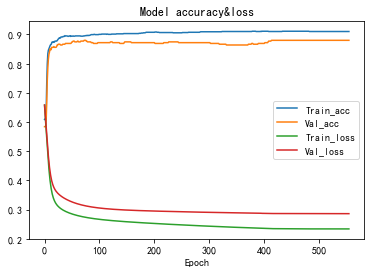

loss, acc: [0.30050674080848694, 0.8691983222961426]


In [6]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler

from tensorflow.python.client import device_lib
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

#Lables = {0: 'crack', 1: 'inclusion', 2: 'pitted'}


def print_history(history):
    # 绘制训练 & 验证的准确率值
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model accuracy&loss')
    # plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.legend(['Train_acc', 'Val_acc', 'Train_loss', 'Val_loss'])
    # plt.legend(['Train_loss', 'Val_loss'])
    plt.show()


def BP(lr):
    model = tf.keras.models.Sequential([
        
        tf.keras.layers.Dense(10, activation='sigmoid', input_shape=(60,)),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    
    model.build(input_shape=(None, 60))

    #二分类问题： 多分类问题：categorical_crossentropy
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(lr),
                  metrics=['accuracy'])

    return model


if __name__ == '__main__':
    # 这里是数据和标签，数据的shape是7，标签one-hot，shape是3

    data = []
    # 读取数据
    raw_data = df[count].values
    raw_feature = raw_data

    # 数据归一化
    scaler = MinMaxScaler()
    scaler.fit(raw_feature)
    scaler.data_max_
    raw_feature = scaler.transform(raw_feature)

    # 将最后一列的缺陷类别转成one-hot编码形式
    x = []
    y = []
    
    for i in range(len(raw_feature)):
        x.append(list(raw_feature[i]))
        if df1.iloc[i][1] == 0:
            y.append([1, 0])
        else:
            y.append([0, 1])
  
   # 随机打乱数据 
    
  
    x = np.array(x)
    y = np.array(y)
    permutation = np.random.permutation(len(x))
    x = x[permutation]
    y = y[permutation]
    # 选取打乱后的前240个数据作为训练数据和验证数据
    train_data = x[0:1500]
    train_label = y[0:1500]
    # 选取打乱后的后60个作为测试数据
    test_data = x[1500:]
    test_label = y[1500:]


    lr = 0.001  #学习率初值，可动态下降
    bp_model = BP(lr=lr)

    bp_model.summary()

    #学习率动态衰减
    lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                      factor=0.8, patience=5,
                                                      min_lr=0.5e-6)

    # 早停法，保存训练中的最优参数
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                                          verbose=0, patience=100, min_delta=0.0001,
                                          restore_best_weights='True')

    history = bp_model.fit(train_data, train_label, batch_size=10, epochs=10000, verbose=1,
                           callbacks=[lr_reducer, es], validation_split=0.25, shuffle=False)

    # 画出四条曲线（训练集和验证集的loss和accuracy缺陷）
    print_history(history)
    # 训练好的模型，在测试集上的准确率
    print('loss, acc:', bp_model.evaluate(test_data, test_label, batch_size=10, verbose=0))


In [7]:
test_label

array([[1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0,

In [8]:
np.set_printoptions(suppress=True)
pre = bp_model.predict(test_data)

(pre == pre.max(axis=1, keepdims=1)).astype(float)  

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.